<span style="color: Blue;">**Neural Networks with
TensorFlow/Keras (Using MNIST digit classification)**</span>

**Description:** Build a simple feed-forward neural
network using TensorFlow/Keras for classification
tasks.

**Objectives:**

Load and preprocess the dataset. **|** Design a neural network architecture (input layer,hidden layers, and output layer). **|** Train the model using backpropagation. **|** Evaluate the model using accuracy and visualize the training/validation loss.

**Tools:** Python, TensorFlow/Keras, pandas, matplotlib


In [ ]:
# Library Imports
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the MNIST Dataset
from keras.datasets import mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

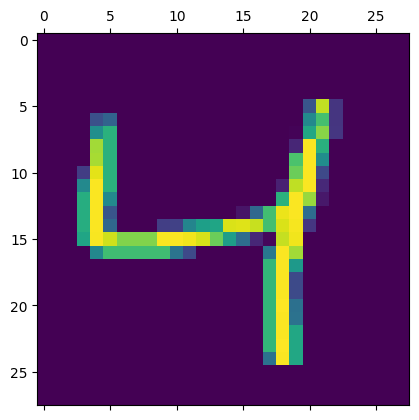

In [ ]:
# Visualizing a sample MNIST image
plt.matshow(X_train[2])

In [ ]:
# Inspecting the shape of training data
X_train.shape

(60000, 28, 28)

In [ ]:
# Inspecting the shape of test data
X_test.shape

(10000, 28, 28)

In [ ]:
# Converting 28x28 images to 1D vectors
X_train_reshaped = X_train.reshape(len(X_train), 28*28)
X_test_reshaped = X_test.reshape(len(X_test), 28*28)

In [ ]:
# Checking shape of reshaped training data
X_train_reshaped.shape

(60000, 784)

In [ ]:
# Checking shape of reshaped test data
X_test_reshaped.shape

(10000, 784)

In [ ]:
# Scaling features using Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

In [ ]:
# Building, compiling, and training the neural network
model = keras.Sequential([
        keras.layers.Dense(128, input_shape=(784,), activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8732 - loss: 0.4261
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9686 - loss: 0.1034
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9780 - loss: 0.0707
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9848 - loss: 0.0485
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0412


In [ ]:
# Evaluating the accuracy on a test dataset
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0946


[0.08005035668611526, 0.9775999784469604]

The accuracy score of 0.9737 indicates that roughly 97.39% of the test images were correctly classified.



In [ ]:
# Training the model with validation split
history = model.fit(
    X_train_scaled, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9900 - loss: 0.0294 - val_accuracy: 0.9857 - val_loss: 0.0463
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9906 - loss: 0.0272 - val_accuracy: 0.9863 - val_loss: 0.0439
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9851 - val_loss: 0.0494
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 0.9864 - val_loss: 0.0459
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9822 - val_loss: 0.0635


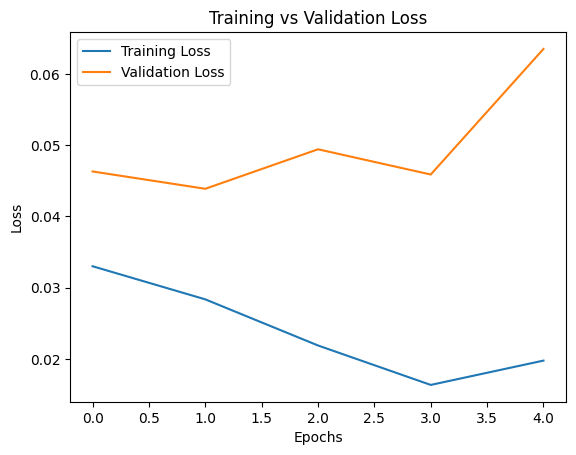

In [ ]:
# Visualizing Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

The training loss steadily decreases, meaning the model is learning and fitting the training data better over time.

The validation loss decreases initially but then starts to rise, especially in the last epoch, which suggests the model is starting to overfit. It performs well on training data but less well on unseen validation data. Techniques like early stopping or regularization could help improve the model performance.

# **Hi there! I would be really grateful if you could take a moment to review my work and share any feedback. Your insights would be highly appreciated**



